# LIGHTGBM

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### DATASET

In [4]:
df = pd.read_csv("C://Users//ertug//Desktop//Machine_Learning_Courses//_3_Classification//diabetes.csv//diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
y = df["Outcome"]

In [7]:
X = df.drop(["Outcome"], axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.3,
                                                    random_state=42)

### Model & Training

In [9]:
import lightgbm
from lightgbm import LGBMClassifier

In [10]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [11]:
dir(lgbm_model)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base_doc',
 '_best_iteration',
 '_best_score',
 '_check_n_features',
 '_class_map',
 '_class_weight',
 '_classes',
 '_estimator_type',
 '_evals_result',
 '_fobj',
 '_get_param_names',
 '_get_tags',
 '_le',
 '_more_tags',
 '_n_classes',
 '_n_features',
 '_n_features_in',
 '_objective',
 '_other_params',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'best_iteration_',
 'best_score_',
 'booster_',
 'boosting_type',
 'class_weight',
 'classes_',
 'colsample_bytree',
 'evals_result_',
 'feature_importances_',
 'feature_name_',
 'fit',
 'get_param

In [12]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\users\ertug\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (

In [13]:
y_pred = lgbm_model.predict(X_test)

In [14]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.5263613559678152

In [15]:
accuracy_score(y_test, y_pred)

0.7229437229437229

In [16]:
r2_score(y_test, y_pred)

-0.22384105960264944

In [17]:
confusion_matrix(y_test, y_pred)

array([[115,  36],
       [ 28,  52]], dtype=int64)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       151
           1       0.59      0.65      0.62        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.72      0.73       231



In [19]:
lgbm_model.predict_proba(X_test)

array([[5.50844081e-01, 4.49155919e-01],
       [8.77802474e-01, 1.22197526e-01],
       [9.87693561e-01, 1.23064385e-02],
       [8.67813908e-01, 1.32186092e-01],
       [6.27765552e-01, 3.72234448e-01],
       [1.70811635e-01, 8.29188365e-01],
       [9.99216408e-01, 7.83591619e-04],
       [9.28381745e-02, 9.07161825e-01],
       [3.08948936e-01, 6.91051064e-01],
       [4.66100670e-01, 5.33899330e-01],
       [9.35878516e-01, 6.41214844e-02],
       [4.11524077e-03, 9.95884759e-01],
       [9.57736224e-01, 4.22637761e-02],
       [7.74636203e-01, 2.25363797e-01],
       [9.99276437e-01, 7.23563393e-04],
       [5.74406447e-01, 4.25593553e-01],
       [9.85113866e-01, 1.48861337e-02],
       [9.99593715e-01, 4.06284769e-04],
       [3.63080218e-02, 9.63691978e-01],
       [6.44754261e-01, 3.55245739e-01],
       [6.08690877e-01, 3.91309123e-01],
       [9.94214324e-01, 5.78567598e-03],
       [9.15603174e-01, 8.43968264e-02],
       [9.99860801e-01, 1.39199097e-04],
       [5.550613

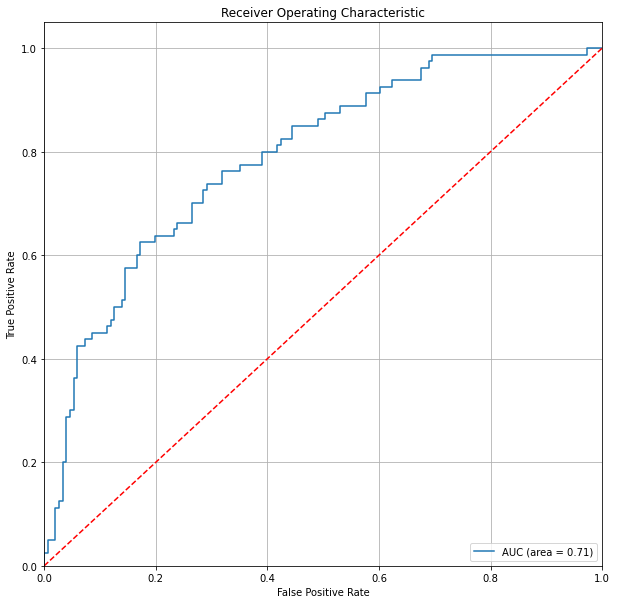

In [20]:
logit_roc_auc = roc_auc_score(y_test, lgbm_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lgbm_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("GBM_ROC")
plt.grid(1)
plt.show()

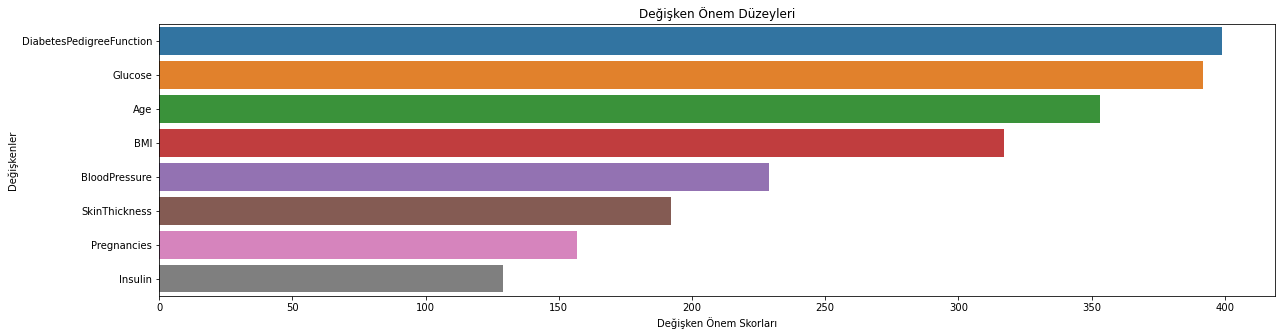

In [21]:
feature_imp = pd.Series(lgbm_model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");

### MODEL TUNING

In [22]:
lgbm_model = LGBMClassifier()

In [23]:
lgbm_params = {"learning_rate": [.1, .01, .001, .0001, .00001],
               "n_estimaterts": [200, 500, 1000, 2000],
               "max_depth": [2, 3, 5, 8]}

In [24]:
lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 692 tasks      | elapsed:   35.1s


[LightGBM] [Warning] Unknown parameter: n_estimaterts


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   39.8s finished


In [25]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimaterts': 200}

In [26]:
lgbm_cv_model.best_score_

0.7690076869322152

In [27]:
lgbm_tuned = LGBMClassifier(learning_rate=lgbm_cv_model.best_params_.get("learning_rate"),
                            n_estimaterts=lgbm_cv_model.best_params_.get("n_estimaterts"),
                            max_depth=lgbm_cv_model.best_params_.get("max_depth")).fit(X_train,
                                                                                       y_train)

In [28]:
y_pred = lgbm_tuned.predict(X_test)

In [29]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.496742636335202

In [30]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [31]:
r2_score(y_test, y_pred)

-0.08998344370860956

In [32]:
confusion_matrix(y_test, y_pred)

array([[121,  30],
       [ 27,  53]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



In [34]:
lgbm_tuned.predict_proba(X_test)

array([[0.57704805, 0.42295195],
       [0.9220817 , 0.0779183 ],
       [0.92585403, 0.07414597],
       [0.84612637, 0.15387363],
       [0.47557763, 0.52442237],
       [0.33061042, 0.66938958],
       [0.99775003, 0.00224997],
       [0.23035875, 0.76964125],
       [0.33902692, 0.66097308],
       [0.49523487, 0.50476513],
       [0.71939741, 0.28060259],
       [0.10766553, 0.89233447],
       [0.83025996, 0.16974004],
       [0.87291041, 0.12708959],
       [0.97820976, 0.02179024],
       [0.46920684, 0.53079316],
       [0.88166526, 0.11833474],
       [0.99134966, 0.00865034],
       [0.10724267, 0.89275733],
       [0.51408488, 0.48591512],
       [0.54323632, 0.45676368],
       [0.95708069, 0.04291931],
       [0.65330246, 0.34669754],
       [0.97288592, 0.02711408],
       [0.39324643, 0.60675357],
       [0.05243104, 0.94756896],
       [0.92831549, 0.07168451],
       [0.98631323, 0.01368677],
       [0.96965908, 0.03034092],
       [0.86081545, 0.13918455],
       [0.

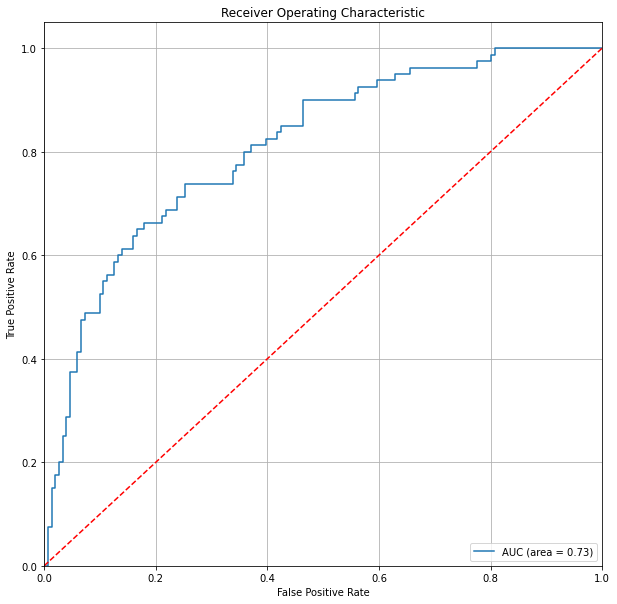

In [35]:
logit_roc_auc = roc_auc_score(y_test, lgbm_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lgbm_tuned.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("GBM_ROC")
plt.grid(1)
plt.show()

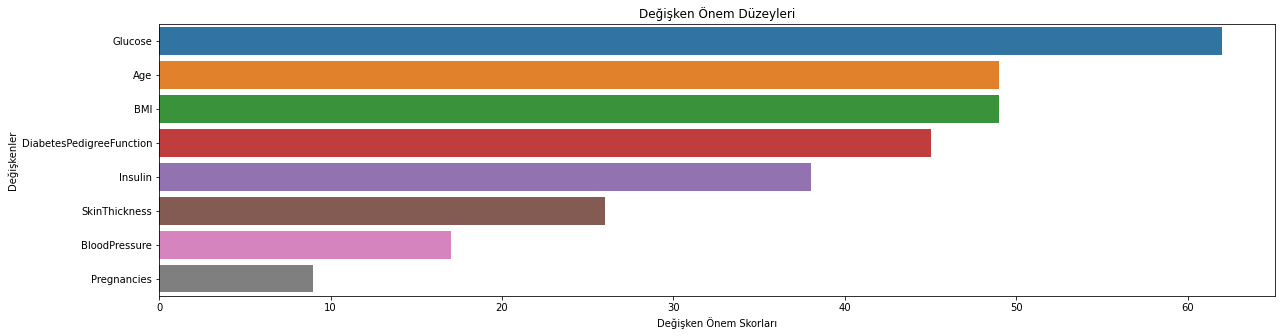

In [37]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");